  ###                                            The Sparks Foundation - GRIP July 2021
 
 ##   Task 2 - Prediction using Unsupervised Maching Learning 
 ##    By - Yash Mathur
  
  
  Problem Statement - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
 
 Dataset Link -: https://bit.ly/3kXTdox

###### Importing the libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

######  Reading the dataset

In [2]:
data=pd.read_csv('Iris.csv')
data=data.drop(['Id'],axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the shape and checking is there any null values 

In [3]:
print(data.shape)
print(data.isnull().sum())

(150, 5)
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

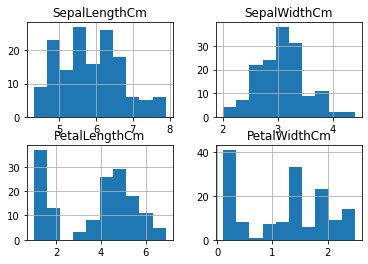

In [5]:
data.hist()

In [6]:
x=data.iloc[:,:-1].values
y=data['Species'].values

###### Now we use the elbow method to find the number of clusters

Text(0, 0.5, 'Inertia')

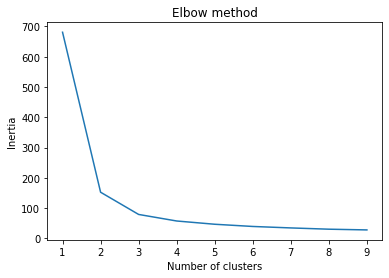

In [7]:
elbow=[]
from sklearn.cluster import KMeans
kmeans=KMeans()
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)
plt.plot(range(1,10),elbow,markerfacecolor='red') 
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

###### From the elbow method we can see that 3 clusters are suitable 

## Now we will fit the kmeans with number of clusters=3

In [8]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)
y_kmeans=kmeans.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Now we will plot the points on the basis of clustering as well as the actual 

#### Sepal length and Sepal width

Text(0.5, 1.0, 'Actual with respect to species')

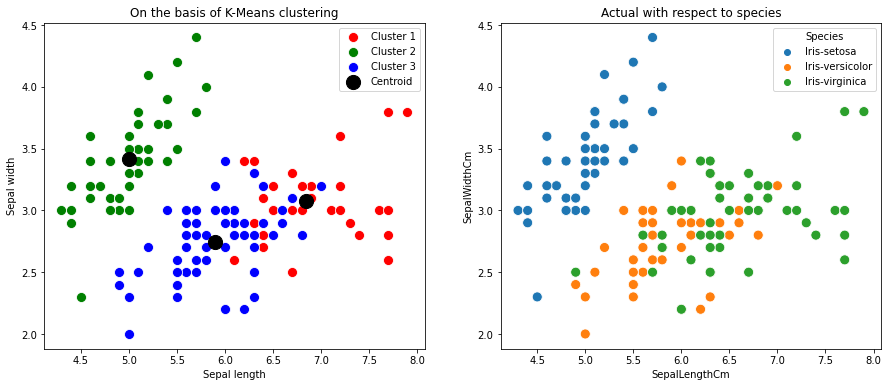

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=x[y_kmeans==0,0],y=x[y_kmeans==0,1],color='red',s=100,label='Cluster 1')
sns.scatterplot(x=x[y_kmeans==1,0],y=x[y_kmeans==1,1],color='green',s=100,label='Cluster 2')
sns.scatterplot(x=x[y_kmeans==2,0],y=x[y_kmeans==2,1],color='blue',s=100,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroid')
plt.legend()

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('On the basis of K-Means clustering')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data,s=100)
plt.title('Actual with respect to species')


#### Petal length and Petal width

Text(0.5, 1.0, 'Actual with respect to species')

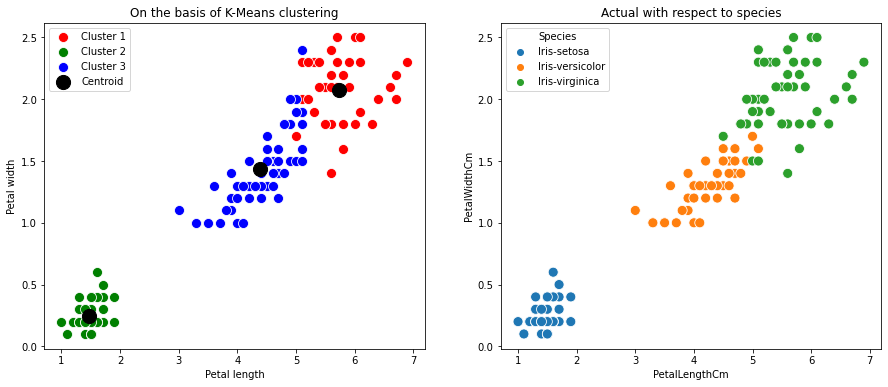

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x=x[y_kmeans==0,2],y=x[y_kmeans==0,3],color='red',s=100,label='Cluster 1')
sns.scatterplot(x=x[y_kmeans==1,2],y=x[y_kmeans==1,3],color='green',s=100,label='Cluster 2')
sns.scatterplot(x=x[y_kmeans==2,2],y=x[y_kmeans==2,3],color='blue',s=100,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=200,c='black',label='Centroid')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('On the basis of K-Means clustering')
plt.legend()
plt.subplot(1,2,2)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data,s=100)
plt.title('Actual with respect to species')

##### From the above figures , we can see that clustered and the actual figures are similar .

### Evaluating our model


In [29]:
data['Cluster Number']=kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster Number
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [30]:
pd.crosstab(y,y_kmeans)

col_0,0,1,2
row_0,,,
Iris-setosa,0,50,0
Iris-versicolor,2,0,48
Iris-virginica,36,0,14


### The optimum number of clusters for this dataset is 3 .

# Thank You !!